# Biblioteke

In [277]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ones,vstack
from numpy.linalg import lstsq
from matplotlib import _cntr as cntr

# Random2DGaussian 1. dio

In [278]:
class Random2DGaussian():
    def __init__(self, minx=0,maxx=10,miny=0,maxy=10):
        self.minx = minx
        self.maxx = maxx
        self.miny = miny
        self.maxy = maxy
        self.mean = (np.random.random_sample()*(self.maxx-self.minx)+self.minx,np.random.random_sample()*(self.maxy-self.miny)+self.miny)
        self.cov_matrix = self.create_cov_matrix()
        
    def create_cov_matrix(self):
        eigenvalx = (np.random.random_sample() * (self.maxx-self.minx)/5)**2
        eigenvaly = (np.random.random_sample() * (self.maxy-self.miny)/5)**2
        D = np.array([[eigenvalx,0],[0,eigenvaly]])
        angle = np.random.random_sample() * 2*np.pi - np.pi #angle in radians
        R = np.array([[np.cos(angle), np.sin(-angle)],[np.sin(angle),np.cos(angle)]])
#         cos = np.random.random_sample()*2-1
#         sin = np.sqrt(1-cos**2)
#         R = np.array([[cos,-sin],[sin,cos]])
        cov_matrix = np.dot(np.dot(np.transpose(R),D),R)
        return cov_matrix
        
    def get_sample(self,n):
        return np.random.multivariate_normal(self.mean, self.cov_matrix, n)
    
def sample_gauss_2d(C,N):
    if C==1:
        G = Random2DGaussian()
        X = G.get_sample(N)
        Y = np.array([0]*N)
        return X, Y
    else:
        G = Random2DGaussian()
        X = G.get_sample(N)
        Y = np.array([0]*N)
        for i in range(1,C):
            G = Random2DGaussian()
            X = np.vstack((X,G.get_sample(N)))
            Y = np.vstack((Y,[i]*N))
        return X, Y.flatten()

# Binarna logisticka regresija 2.dio

In [279]:
def binlogreg_train(X,Y_,verbose=False):
    '''
    Argumenti
      X:  podatci, np.array Nx2
      Y_: indeksi razreda, np.array Nx1

    Povratne vrijednosti
      w, b: parametri logističke regresije
    '''
    w = np.array([np.random.randn(1),np.random.rand(1)])
    b = 0
    number_of_iterations = 100000
    param_delta = 0.6
    for i in range(number_of_iterations):
        #klasifikacijski rezultat
        scores = np.dot(X,w)+b #N x 1
        
        #vjerojatnosti razreda c1
        probs = np.exp(scores) / (1+np.exp(scores)) # N x 1
        
        #izracunaj probs da je klasa 0 blabla
        loss = np.sum(-np.log(probs)) #scalar  ovo je krivo mislim da treba bez minusa ic.... #triggered
        
        if i%10 == 0 and verbose:
            print ("iteration {}: loss {}".format(i,loss))
        
        #derivacije gubitka po klasifikacijskom rezultatu
        dL_dscores = probs[:,0] - Y_ # N x 1
        num_examples = len(X)
        
        #gradijenti parametara
        grad_w = 1./num_examples * np.sum(X*dL_dscores.reshape(-1,1),axis=0) # D x 1
        grad_b = 1./num_examples * np.sum(dL_dscores) # 1 x 1
        
        #poboljsani parametri
        w += -param_delta * grad_w.reshape(-1,1)
        b += -param_delta * grad_b
    return w,b

def binlogreg_classify(X,w,b):
    #klasifikacijski rezultat
    scores = np.dot(X,w)+b #N x 1

    #vjerojatnosti razreda c1
    probs = np.exp(scores) / (1+np.exp(scores)) # N x 1...vraca isti rezultat kao i bez normalizacije
    
    return probs

In [280]:
def my_dummy_decision(X):
    scores = X[:,0]+X[:,1] -5
    return scores

def get_statistical_data(Y,Y_):
    correct_classification = Y[np.where(Y==Y_)]
    incorrect_classification = Y[np.where(Y!=Y_)]
    TP = len(correct_classification[np.where(correct_classification==1)])
    TN = len(correct_classification[np.where(correct_classification==0)])
    FP = len(incorrect_classification[np.where(incorrect_classification==1)])
    FN = len(incorrect_classification[np.where(incorrect_classification==0)])
    return TP,TN,FP,FN

def get_precision(TP,FP):
    return (1.*TP)/(TP+FP)

def get_recall(TP,FN):
    return (1.*TP)/(TP+FN)

def get_accuracy(TP,TN,FP,FN):
    return (1.*TP+TN)/(TP+TN+FP+FN)

def eval_perf_binary(Y,Y_):
    TP,TN,FP,FN = get_statistical_data(Y,Y_)
    return get_accuracy(TP,TN,FP,FN), get_recall(TP,FN), get_precision(TP,FP)

def average_precision_at_index(Yranked, index):
    if index > len(Yranked):
        raise Exception("Index out of range")
    Ypredicted = np.zeros(Yranked.shape)
    Ypredicted[index:]=1
    TP,TN,FP,FN = get_statistical_data(Ypredicted,Yranked)
    if TP == 0 and FP == 0:
        return 0.0
    return get_precision(TP,FP)
    
def eval_AP(Yranked):
    numerator = np.sum([average_precision_at_index(Yranked,index)*element for index,element in enumerate(Yranked)])
    denominator = np.sum(Yranked)
    return numerator/denominator


## Graficki prikaz klasifikacije

In [302]:
def graph_data(X,Y_,Y):
    correctly_classified = X[np.where(Y==Y_)]
    incorrectly_classified = X[np.where(Y!=Y_)]
    
    colors = np.array([0.3]*len(X))
    colors[np.where(Y_==1)] = 1
    
    color_correct = colors[np.where(Y==Y_)]
    color_incorrect = colors[np.where(Y!=Y_)]
    
    plt.scatter(correctly_classified[:,0],correctly_classified[:,1],color=zip(color_correct,color_correct,color_correct),marker='o',edgecolors=(0,0,0))
    plt.scatter(incorrectly_classified[:,0],incorrectly_classified[:,1],color=zip(color_incorrect,color_incorrect,color_incorrect),marker='s',edgecolors=(0,0,0))
    
def graph_surface(fun, rect, offset=0):
    xmin,ymin = bbox[0]
    xmax,ymax = bbox[1]
    x_range = np.linspace(xmin,xmax,num=100)
    y_range = np.linspace(ymin,ymax,num=100)
    x,y = np.meshgrid(x_range,y_range)
    grid = np.stack((x.flatten(),y.flatten())).transpose()
    dec = fun(grid)
    temp = dec.reshape(-1)
    
    #decision_boundary
    c = cntr.Cntr(x, y, dec.reshape(x.shape))
    # trace a contour at z == 0.5
    res = c.trace(0.5)
    # result is a list of arrays of vertices and path codes
    # (see docs for matplotlib.path.Path)
    nseg = len(res) // 2
    segments, codes = res[:nseg], res[nseg:]
    plt.plot(segments[0][:,0],segments[0][:,1],color=(0,0,0))
    
    plt.pcolormesh(x, y, dec.reshape(x.shape),vmin = dec.reshape(x.shape).min(), vmax=dec.reshape(x.shape).max())


def get_decision_line_points(points,bbox):
    xmin,ymin = bbox[0]
    xmax,ymax = bbox[1]
    x_coords, y_coords = zip(*points)
    A = vstack([x_coords,ones(len(x_coords))]).T
    a, b = lstsq(A, y_coords)[0]
    y1 = xmin * a + b
    y2 = xmax * a + b
    return np.array([[xmin,y1],[xmax,y2]])
    

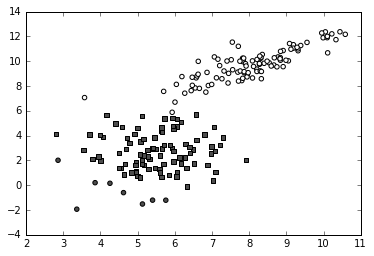

In [303]:
np.random.seed(100)

#get the training dataset
X,Y_ = sample_gauss_2d(2,100)

#class predictions
Y = my_dummy_decision(X)>0.5

#graph data points
graph_data(X,Y_,Y)

#show results 
plt.show()

In [304]:
def binlogreg_decfun(X,w,b):
    def classify(X):
        return binlogreg_classify(X,w,b)
    return classify

# Main za binarni logicki regression

(1.0, 1.0, 1.0, 1.0)


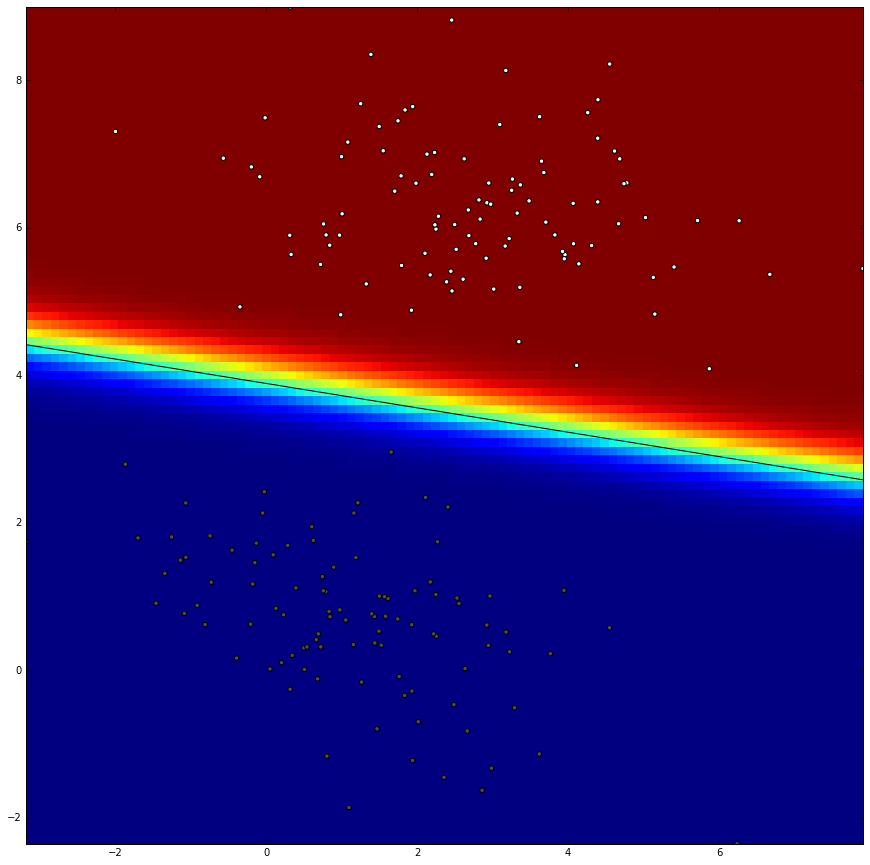

In [305]:
# np.random.seed(2000)

# instantiate the dataset
X,Y_ = sample_gauss_2d(2,100)

# train the logistic regression model
w,b = binlogreg_train(X,Y_)

# evaluate the model on the train set
probs = binlogreg_classify(X,w,b)

# recover the predicted classes Y
Y = probs >0.5
Y = Y.flatten()
# evaluate and print performance measures
acc, recall, precision = eval_perf_binary(Y,Y_)
AP = eval_AP(Y_[probs.flatten().argsort()])
print(acc, recall, precision, AP)

# graph the decision surface
decfun = binlogreg_decfun(X, w,b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))

#axis limits of the graph
xmin, ymin = bbox[0]
xmax, ymax = bbox[1]
plt.figure(figsize=(15,15))
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

graph_surface(decfun, bbox, offset=0.5)

# graph the data points
graph_data(X, Y_, Y)

# show the plot
plt.show()

# linkz za decision boundary
http://stackoverflow.com/questions/19054923/plot-decision-boundary-matplotlib  
http://stackoverflow.com/questions/5666056/matplotlib-extracting-data-from-contour-lines  
http://stackoverflow.com/questions/18304722/python-find-contour-lines-from-matplotlib-pyplot-contour  